In [4]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

IMAGE_SIZE=[224,224]


model=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

model.summary()



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
for layer in model.layers:
    layer.trainable=False
    
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
folders=glob("Image_Dataset/train/*")
print(folders)


['Image_Dataset/train\\raghu', 'Image_Dataset/train\\siva']


In [10]:
x=Flatten()(model.output)
predict=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=model.input,outputs=predict)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [15]:
train_path='./Image_Dataset/train'
test_path='./Image_Dataset/test'

train_data=train_datagen.flow_from_directory(train_path,target_size=(224,224),
                                             batch_size=90,class_mode='categorical')

test_data=test_datagen.flow_from_directory(test_path,target_size=(224,224),
                                             batch_size=90,class_mode='categorical')




Found 200 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [16]:
history=model.fit(train_data,validation_data=test_data,epochs=10,steps_per_epoch=len(train_data),
                  validation_steps=len(test_data))


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 2 steps
Epoch 1/10
3/3 [==============================] - 74s 25s/step - loss: 0.8192 - accuracy: 0.4700 - val_loss: 0.7947 - val_accuracy: 0.5833
Epoch 2/10
3/3 [==============================] - 70s 23s/step - loss: 0.3267 - accuracy: 0.7100 - val_loss: 0.1258 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 69s 23s/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.6317 - val_accuracy: 0.5667
Epoch 4/10
3/3 [==============================] - 68s 23s/step - loss: 0.0445 - accuracy: 1.0000 - val_loss: 0.6015 - val_accuracy: 0.5667
Epoch 5/10
3/3 [==============================] - 70s 23s/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9000
Epoch 6/10
3/3 [==============================] - 68s 23s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 68s 23s/step - loss: 8.551

In [17]:
model.save('face_recognition_model.h5')

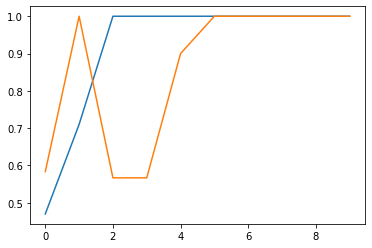

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


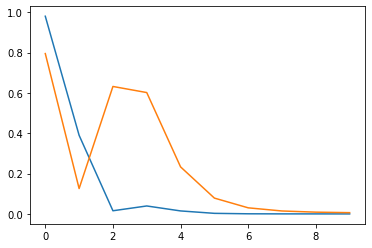

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
